In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
all_surfaces = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

# 20x CD86 P4G4+TCPS+Smooth data

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8723905061631262
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8762772232039573
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8726059846367364


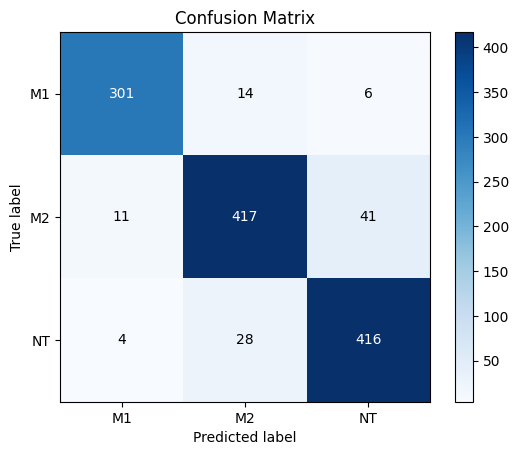

Calculate metrics for M1 and M2 only
____________________________________
 M1,   M2
[[301  14]
 [ 11 417]]
Accuracy (Correctly predicted M1+M2 / all predictions): 0.9663526244952894
Precision (Correctly predicted M1 / all cells predicted as M1): 0.9647435897435898
Sensitivity (Correctly predicted M1 / all actual M1): 0.9555555555555556
Specificity (Correctly predicted M2 / all actual M2): 0.9742990654205608
F1-score (How good the model performs in correctly identifying M1 and avoiding misclassifying M2): 0.960127591706539


In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces, confusion_matrix=True)
macrophages_analysis.calculate_metrics_for_M1_M2(pipe, test_data)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9960897821352983
AUC score for M2 0.9775246006637812
AUC score for NT 0.9855956148282098
Average AUC 0.9864033325424297


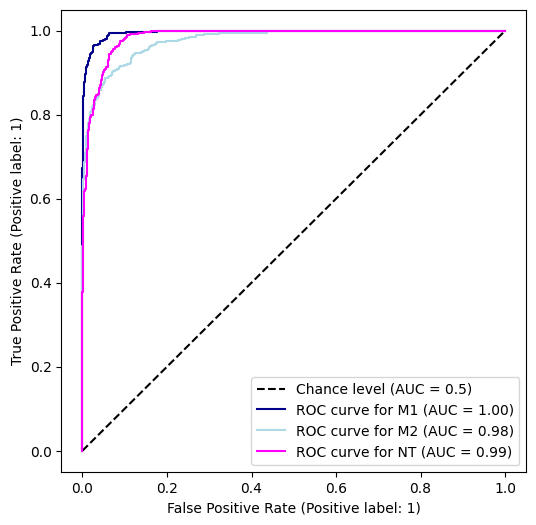

In [4]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

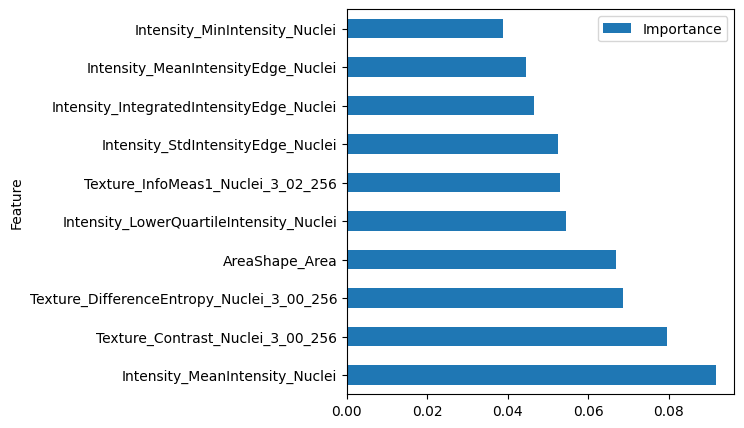

In [5]:
important_features_smooth = macrophages_analysis.get_best_features(pipe, all_surfaces.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))   

# 20x CD86 P4G4+TCPS+Smooth data without intestity features

In [6]:
nucleus_dataset_p4g4_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_intensity_data.csv')
all_surfaces_no_intensity = pd.concat([nucleus_dataset_p4g4_no_intensity, nucleus_dataset_smooth_no_intensity, nucleus_dataset_tcps_no_intensity])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.7220626803042224
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7276009028960327
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7229213016790178


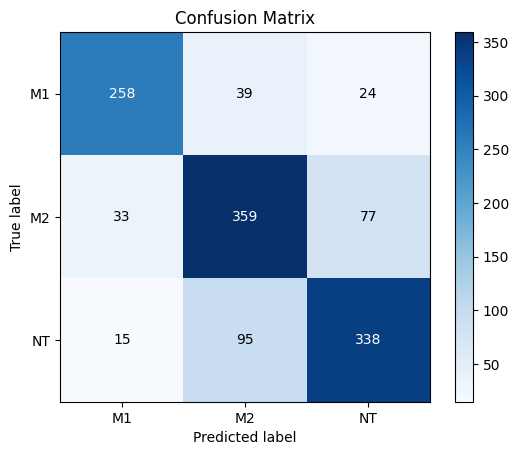

In [7]:
pipe_no_intensity, test_data_no_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_intensity, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9506109927740805
AUC score for M2 0.8857098494153791
AUC score for NT 0.9133730786618446
Average AUC 0.916564640283768


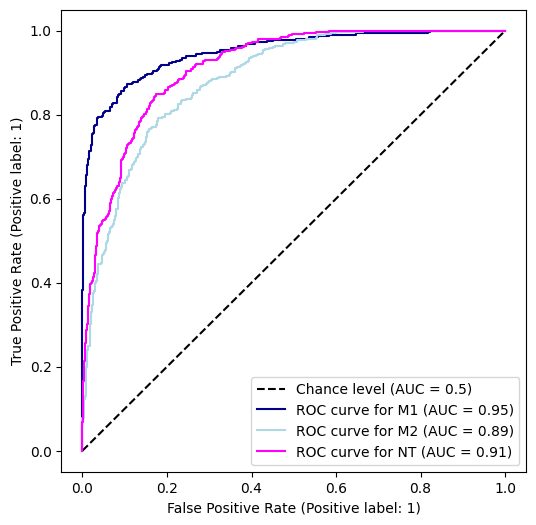

In [8]:
macrophages_analysis.make_multiclass_roc(pipe_no_intensity, test_data_no_intensity)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

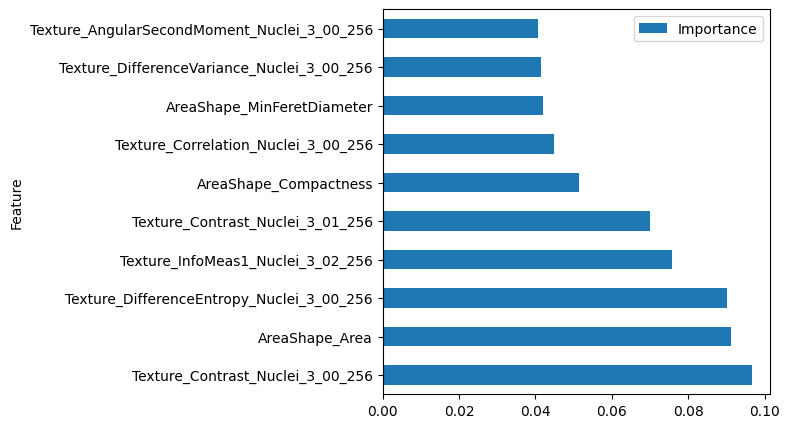

In [9]:
important_features = macrophages_analysis.get_best_features(pipe_no_intensity, all_surfaces_no_intensity.drop('CellType', axis=1), 10)
important_features.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

# 20x CD86 P4G4+TCPS+Smooth data without shape features

In [10]:
nucleus_dataset_p4g4_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_shape_data.csv')
all_surfaces_no_shape = pd.concat([nucleus_dataset_p4g4_no_shape, nucleus_dataset_smooth_no_shape, nucleus_dataset_tcps_no_shape])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8675255704169944
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8703818808995422
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8679175563399184


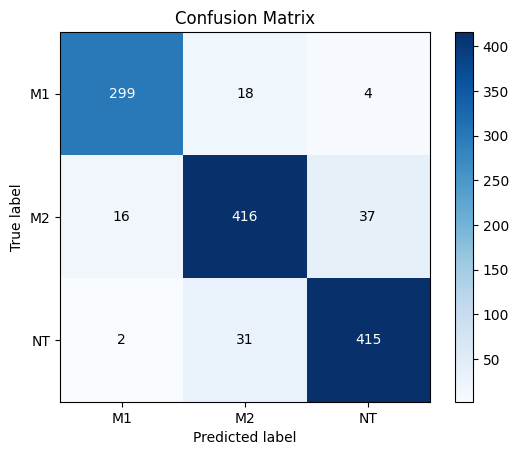

In [11]:
pipe_no_shape, test_data_no_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_shape, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9954918687172379
AUC score for M2 0.97673438492102
AUC score for NT 0.9849203209764918
Average AUC 0.9857155248715833


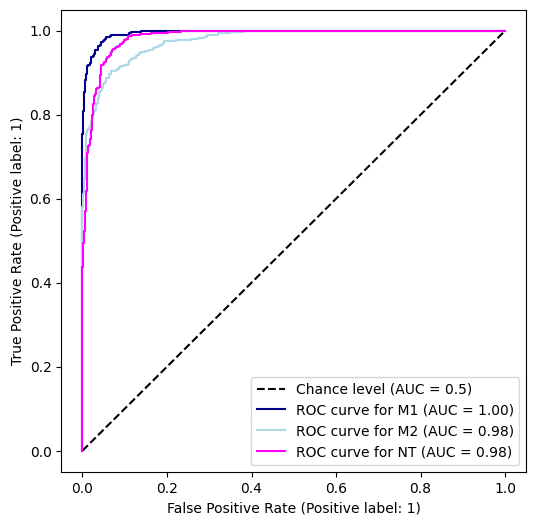

In [12]:
macrophages_analysis.make_multiclass_roc(pipe_no_shape, test_data_no_shape)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

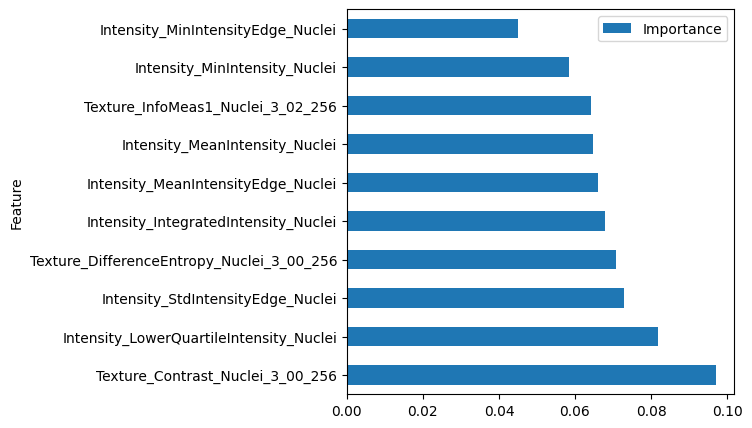

In [13]:
important_features = macrophages_analysis.get_best_features(pipe_no_shape, all_surfaces_no_shape.drop('CellType', axis=1), 10)
important_features.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

## 20x CD86 P4G4+TCPS+Smooth data only shape features

In [14]:
nucleus_dataset_p4g4_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Area')
nucleus_dataset_smooth_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Area')
nucleus_dataset_tcps_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Area')
all_surfaces_shape = pd.concat([nucleus_dataset_p4g4_shape, nucleus_dataset_smooth_shape, nucleus_dataset_tcps_shape])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.47336087070548133
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.47938342111993554
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.4732287132056509


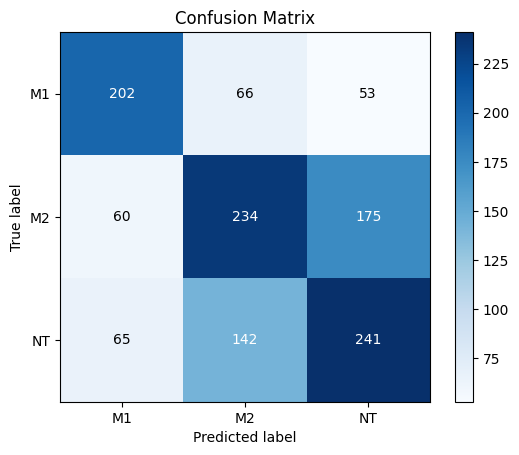

In [15]:
pipe_shape, test_data_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_shape, confusion_matrix=True)

AUC score for M1 0.844712373070795
AUC score for M2 0.6940783727655608
AUC score for NT 0.6947247965641954
Average AUC 0.7445051808001838


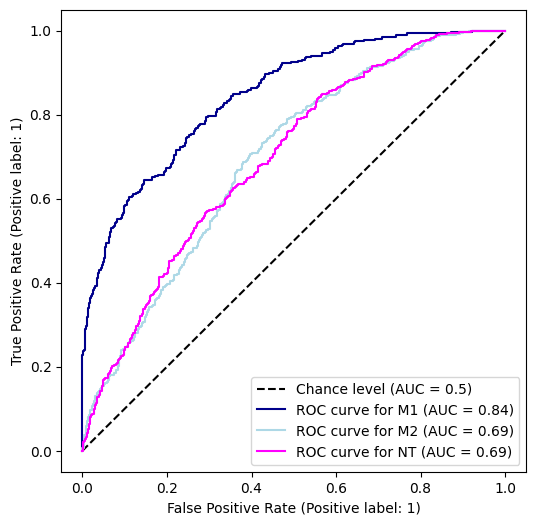

In [16]:
macrophages_analysis.make_multiclass_roc(pipe_shape, test_data_shape)

<AxesSubplot:ylabel='Feature'>

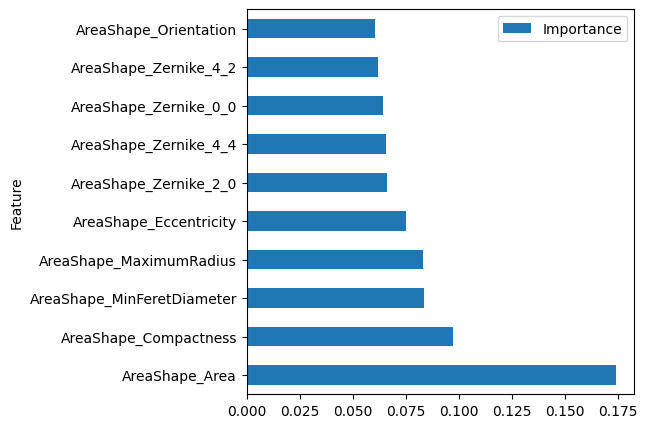

In [17]:
important_features = macrophages_analysis.get_best_features(pipe_shape, all_surfaces_shape.drop('CellType', axis=1), 10)
important_features.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

## 20x CD86 P4G4+TCPS+Smooth data only texture features

In [18]:
nucleus_dataset_p4g4_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Texture')
nucleus_dataset_smooth_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Texture')
nucleus_dataset_tcps_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Texture')
all_surfaces_texture = pd.concat([nucleus_dataset_p4g4_texture, nucleus_dataset_smooth_texture, nucleus_dataset_tcps_texture])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.6268030422239705
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.6302936983017322
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.6287998884659098


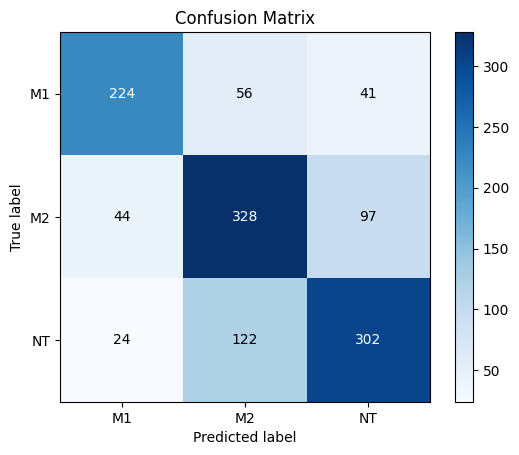

In [19]:
pipe_texture, test_data_texture = macrophages_analysis.make_nucleus_classifier(all_surfaces_texture, confusion_matrix=True)

AUC score for M1 0.8852515822623548
AUC score for M2 0.8319890423417003
AUC score for NT 0.8546225135623869
Average AUC 0.8572877127221473


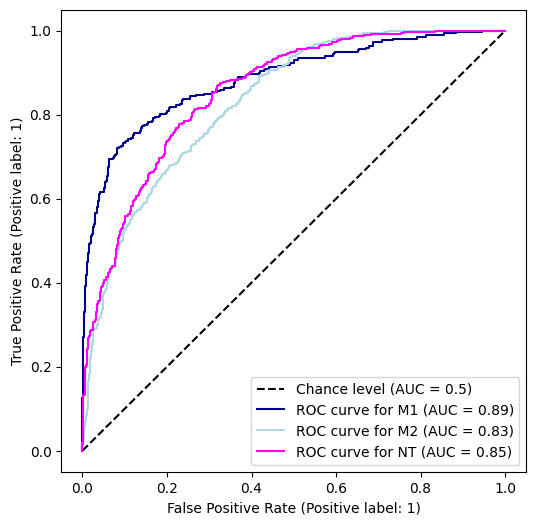

In [20]:
macrophages_analysis.make_multiclass_roc(pipe_texture, test_data_texture)

<AxesSubplot:ylabel='Feature'>

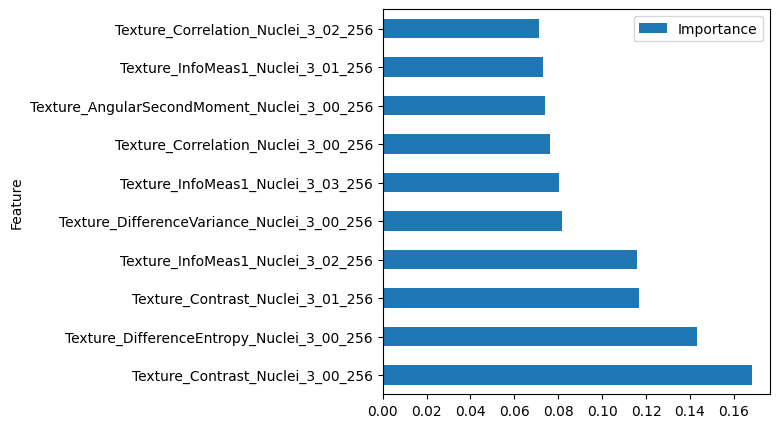

In [21]:
important_features = macrophages_analysis.get_best_features(pipe_texture, all_surfaces_texture.drop('CellType', axis=1), 10)
important_features.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

## 20x CD86 P4G4+TCPS+Smooth data only intensity features

In [22]:
nucleus_dataset_p4g4_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Intensity')
nucleus_dataset_smooth_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Intensity')
nucleus_dataset_tcps_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Intensity')
all_surfaces_intensity = pd.concat([nucleus_dataset_p4g4_intensity, nucleus_dataset_smooth_intensity, nucleus_dataset_tcps_intensity])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.851409651193286
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8546969863491837
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8517425819314912


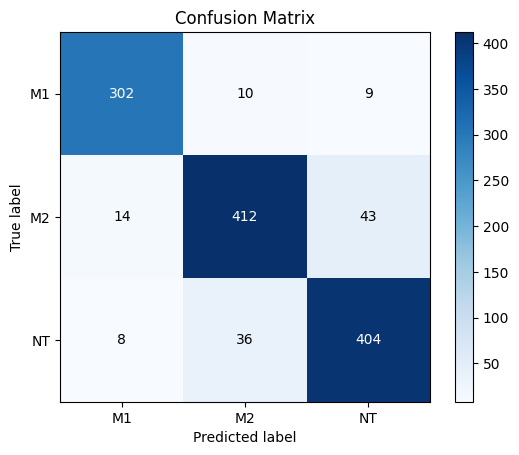

In [23]:
pipe_intensity, test_data_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_intensity, confusion_matrix=True)

AUC score for M1 0.9939291404654893
AUC score for M2 0.9724006754265085
AUC score for NT 0.9796507685352622
Average AUC 0.98199352814242


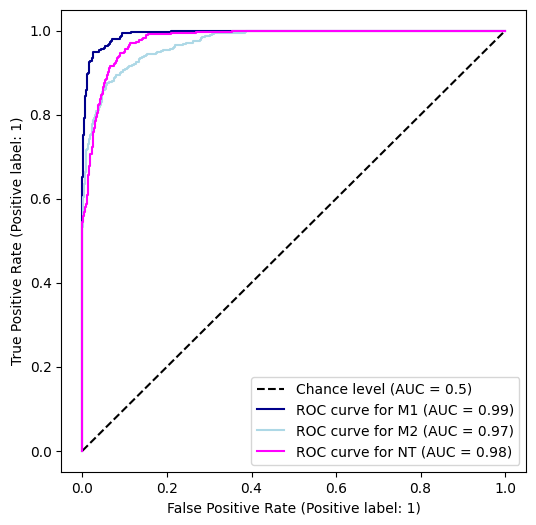

In [24]:
macrophages_analysis.make_multiclass_roc(pipe_intensity, test_data_intensity)

<AxesSubplot:ylabel='Feature'>

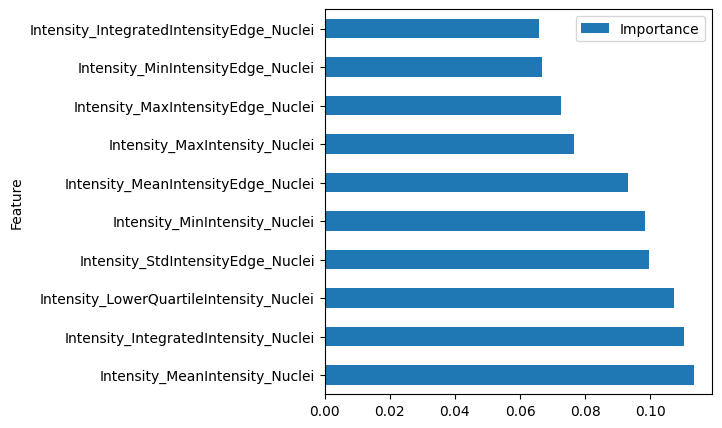

In [25]:
important_features = macrophages_analysis.get_best_features(pipe_intensity, all_surfaces_intensity.drop('CellType', axis=1), 10)
important_features.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))